# Basic analysis of rRNA processing

In [1]:
import numpy as np
import pandas as pd

In [2]:
samples = ["Ctrl_Mock_1", "Ctrl_Mock_2", "Ctrl_Mock_3", "Ctrl_cx_13", "Ctrl_cx_15", "Ctrl_cx_16", 
           "Ctrl_iso_9", "Ctrl_iso_10", "Ctrl_iso_12", "siZC3H8_1_18", "siZC3H8_1_19", "siZC3H8_1_21", 
           "siZC3H8_3_25", "siZC3H8_3_26", "siZC3H8_3_27", "siZC3H8_4_30", "siZC3H8_4_31", "siZC3H8_4_32"]

### Try example sample

In [3]:
df = pd.read_csv('/data/users/yuanhua/huenRNA/rRNAbam/%s/ReadsPerGene.out.tab' %samples[0], 
                 sep='\t', header=None)

In [4]:
df

,0,1,2,3
0,N_unmapped,13799295,13799295,13799295
1,N_multimapping,3317671,3317671,3317671
2,N_noFeature,457802,64334143,1714654
3,N_ambiguous,971403,19028,952375
4,RNA5SN1,995,91,904
5,RNA18SN1,23598715,150334,23448381
6,RNA5-8SN1,92307,1013,91294
7,RNA28SN1,40469773,1086386,39383387


In [5]:
#total input reads, uniquely mapped reads
df[1].values.sum(), df[1].values[2:].sum()

(82707961, 65590995)

In [6]:
f = open('/data/users/yuanhua/huenRNA/rRNAbam/%s/Log.final.out' %samples[0])
lines = f.readlines()
f.close()

total_reads = float(lines[5].split("\t")[1].strip())
mapped_reads = float(lines[8].split("\t")[1].strip())
unmapped_reads = float(lines[32].split("\t")[1].strip())
total_reads, mapped_reads, mapped_reads/total_reads, unmapped_reads, unmapped_reads/total_reads

(82707961.0, 65590995.0, 0.7930433081284642, 13509848.0, 0.16334398571378153)

### Parse all samples

In [7]:
reads_all = []

for samp in samples:    
    _df = pd.read_csv('/data/users/yuanhua/huenRNA/rRNAbam/%s/ReadsPerGene.out.tab' %samp, 
                      sep='\t', header=None)
    _seg_reads = _df[1].values[-4:].sum()
    _mapped_reads = _df[1].values[2:].sum()
    _unmapped_reads = _df[1].values[0]
    _total_reads = _df[1].values.sum()
    _sum_reads = [_total_reads, _unmapped_reads, _mapped_reads, _seg_reads]
    
    reads_all.append(np.append(_sum_reads, _df[1].values[-4:]))

In [8]:
np.array(reads_all)

array([[82707961, 13799295, 65590995, 64161790,      995, 23598715,
           92307, 40469773],
       [59631625, 13034100, 44338866, 43388503,       66, 15489300,
           49219, 27849918],
       [71657403, 14445646, 54333546, 53041030,      318, 18937028,
           65321, 34038363],
       [82429272, 16686091, 62186932, 61143219,      644, 21353082,
           42837, 39746656],
       [58781236, 12873568, 43344669, 42534847,      112, 15363988,
           32284, 27138463],
       [70092840, 12985166, 54350203, 53235144,     2214, 18967886,
           32739, 34232305],
       [76390650, 14842656, 58383321, 56953877,      138, 20663775,
          102012, 36187952],
       [55259204, 10980254, 42050674, 41013202,       66, 15059522,
           66264, 25887350],
       [60321399, 10740950, 47138748, 45868482,      124, 17053182,
           64862, 28750314],
       [61750709, 14960398, 44544871, 43475385,       58, 16189416,
           59446, 27226465],
       [56400556, 13071737, 41

In [9]:
columns = ['input_reads', 'unmapped_reads', 'unique_mapped', 'segment_count', 
           'RNA5SN1', 'RNA18SN1', 'RNA5.8SN1', 'RNA28SN1']

df_counts = pd.DataFrame(np.array(reads_all, dtype=int), columns=columns, index=samples)
df_counts

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,82707961,13799295,65590995,64161790,995,23598715,92307,40469773
Ctrl_Mock_2,59631625,13034100,44338866,43388503,66,15489300,49219,27849918
Ctrl_Mock_3,71657403,14445646,54333546,53041030,318,18937028,65321,34038363
Ctrl_cx_13,82429272,16686091,62186932,61143219,644,21353082,42837,39746656
Ctrl_cx_15,58781236,12873568,43344669,42534847,112,15363988,32284,27138463
Ctrl_cx_16,70092840,12985166,54350203,53235144,2214,18967886,32739,34232305
Ctrl_iso_9,76390650,14842656,58383321,56953877,138,20663775,102012,36187952
Ctrl_iso_10,55259204,10980254,42050674,41013202,66,15059522,66264,25887350
Ctrl_iso_12,60321399,10740950,47138748,45868482,124,17053182,64862,28750314
siZC3H8_1_18,61750709,14960398,44544871,43475385,58,16189416,59446,27226465


In [10]:
df_table = np.array(reads_all, dtype=float)
df_table[:, 3:] = df_table[:, 3:] / df_table[:, 2:3]
df_table[:, 1:3] = df_table[:, 1:3] / df_table[:, 0:1]

df_out = pd.DataFrame(df_table, columns=columns, index=samples)
df_out

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,82707961.0,0.166844,0.793043,0.978210,1.516977e-05,0.359786,0.001407,0.617002
Ctrl_Mock_2,59631625.0,0.218577,0.743546,0.978566,1.488536e-06,0.349339,0.001110,0.628115
Ctrl_Mock_3,71657403.0,0.201593,0.758241,0.976211,5.852738e-06,0.348533,0.001202,0.626470
Ctrl_cx_13,82429272.0,0.202429,0.754428,0.983217,1.035587e-05,0.343369,0.000689,0.639148
Ctrl_cx_15,58781236.0,0.219008,0.737390,0.981317,2.583939e-06,0.354461,0.000745,0.626108
Ctrl_cx_16,70092840.0,0.185257,0.775403,0.979484,4.073582e-05,0.348994,0.000602,0.629847
Ctrl_iso_9,76390650.0,0.194299,0.764273,0.975516,2.363689e-06,0.353933,0.001747,0.619834
Ctrl_iso_10,55259204.0,0.198705,0.760971,0.975328,1.569535e-06,0.358128,0.001576,0.615623
Ctrl_iso_12,60321399.0,0.178062,0.781460,0.973053,2.630532e-06,0.361766,0.001376,0.609908
siZC3H8_1_18,61750709.0,0.242271,0.721366,0.975991,1.302058e-06,0.363441,0.001335,0.611214


In [11]:
# df_counts.to_csv('../table_rRNA_mapping.csv')
# df_out.to_csv('../table_rRNA_mapping_percent.csv', float_format='%.3e')

## Potential Issues
* For STAR counting: it says using the [htseq-count](https://htseq.readthedocs.io/en/master/htseqcount.html)'s
  default setting, including `--mode union`, but what we need is `--mode intersection-strict`. Other 
  parameters `--nonunique none` is fine.
  
* For htseq-count: to detect the paired mates, it requires using the bam directedly produced from STAR (Unsorted), otherwise it will count reads instead of read pairs (i.e., fragments). From this version, it's read pairs.

In [12]:
htcounts_all = []

for samp in samples:    
    _df = pd.read_csv('/data/users/yuanhua/huenRNA/rRNAbam/%s/htseq_count.tsv' %samp, 
                      sep='\t', header=None)
    _seg_reads = _df[1].values[:4].sum()
    _mapped_reads = _df[1].values[:-1].sum()
    _unmapped_reads = None
    _total_reads = _df[1].values.sum()
    _sum_reads = [_total_reads, _unmapped_reads, _mapped_reads, _seg_reads]
    
    htcounts_all.append(np.append(_sum_reads, _df[1].values[[3, 0, 2, 1]]))
    
htcounts_all = np.array(htcounts_all)

# add info from STAR output
htcounts_all[:, 0] = np.array(reads_all, dtype=int)[:, 0]
htcounts_all[:, 1] = np.array(reads_all, dtype=int)[:, 1]

In [13]:
_df

,0,1
0,RNA18SN1,15118249
1,RNA28SN1,26271090
2,RNA5-8SN1,1559
3,RNA5SN1,94
4,__no_feature,1368260
5,__ambiguous,0
6,__too_low_aQual,0
7,__not_aligned,0
8,__alignment_not_unique,2242114


In [14]:
columns = ['input_reads', 'unmapped_reads', 'unique_mapped', 'segment_count', 
           'RNA5SN1', 'RNA18SN1', 'RNA5.8SN1', 'RNA28SN1']

df_htcounts = pd.DataFrame(htcounts_all, columns=columns, index=samples)
df_htcounts

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,82707961,13799295,65590995,63408380,989,23270983,3429,40132979
Ctrl_Mock_2,59631625,13034100,44338866,42928707,57,15300061,1006,27627583
Ctrl_Mock_3,71657403,14445646,54333546,52467709,310,18722282,2690,33742427
Ctrl_cx_13,82429272,16686091,62186932,60667795,643,21238659,3400,39425093
Ctrl_cx_15,58781236,12873568,43344669,42190740,109,15280808,2037,26907786
Ctrl_cx_16,70092840,12985166,54350203,52848313,2209,18872750,3494,33969860
Ctrl_iso_9,76390650,14842656,58383321,56052767,111,20364982,2287,35685387
Ctrl_iso_10,55259204,10980254,42050674,40454087,56,14846679,1403,25605949
Ctrl_iso_12,60321399,10740950,47138748,45364924,113,16849940,2075,28512796
siZC3H8_1_18,61750709,14960398,44544871,42952315,55,15992761,1168,26958331


In [15]:
df_ht_table = np.array(htcounts_all, dtype=float)
df_ht_table[:, 3:] = df_ht_table[:, 3:] / df_ht_table[:, 2:3]
df_ht_table[:, 1:3] = df_ht_table[:, 1:3] / df_ht_table[:, 0:1]

df_htout = pd.DataFrame(df_ht_table, columns=columns, index=samples)
df_htout

,input_reads,unmapped_reads,unique_mapped,segment_count,RNA5SN1,RNA18SN1,RNA5.8SN1,RNA28SN1
Ctrl_Mock_1,82707961.0,0.166844,0.793043,0.966724,1.507829e-05,0.354789,0.000052,0.611867
Ctrl_Mock_2,59631625.0,0.218577,0.743546,0.968196,1.285554e-06,0.345071,0.000023,0.623101
Ctrl_Mock_3,71657403.0,0.201593,0.758241,0.965660,5.705499e-06,0.344581,0.000050,0.621024
Ctrl_cx_13,82429272.0,0.202429,0.754428,0.975571,1.033979e-05,0.341529,0.000055,0.633977
Ctrl_cx_15,58781236.0,0.219008,0.737390,0.973378,2.514727e-06,0.352542,0.000047,0.620787
Ctrl_cx_16,70092840.0,0.185257,0.775403,0.972366,4.064382e-05,0.347243,0.000064,0.625018
Ctrl_iso_9,76390650.0,0.194299,0.764273,0.960082,1.901228e-06,0.348815,0.000039,0.611226
Ctrl_iso_10,55259204.0,0.198705,0.760971,0.962032,1.331727e-06,0.353066,0.000033,0.608931
Ctrl_iso_12,60321399.0,0.178062,0.781460,0.962370,2.397179e-06,0.357454,0.000044,0.604870
siZC3H8_1_18,61750709.0,0.242271,0.721366,0.964248,1.234710e-06,0.359026,0.000026,0.605195


In [16]:
df_htcounts.to_csv('../table_htseq_rRNA_mapping.csv')
df_htout.to_csv('../table_htseq_rRNA_mapping_percent.csv', float_format='%.3e')

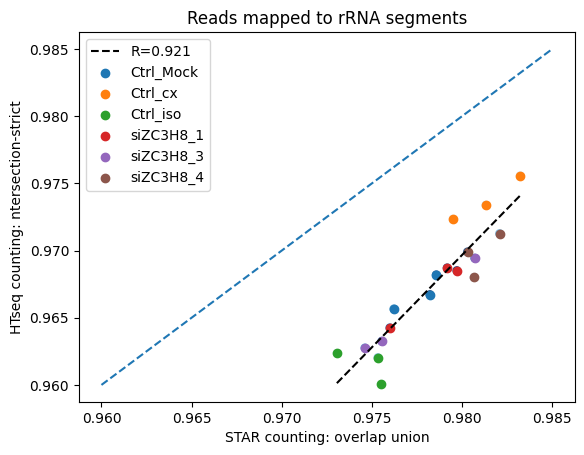

In [17]:
import hilearn
import matplotlib.pyplot as plt

color_groups = np.array(['_'.join(x.split('_')[:2]) for x in df_out.index])
hilearn.corr_plot(df_out['segment_count'].values, df_htout['segment_count'].values)
for _group in np.unique(color_groups):
    _idx = color_groups == _group
    plt.scatter(df_out['segment_count'].values[_idx], 
                df_htout['segment_count'].values[_idx],
                label=_group)
plt.plot([0.960, 0.985], [0.960, 0.985], '--')
plt.xlabel('STAR counting: overlap union')
plt.ylabel('HTseq counting: ntersection-strict')
plt.title('Reads mapped to rRNA segments')
plt.legend()
plt.show()